In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import VECM
import numpy as np

In [133]:
dataset = pd.read_excel("WTI.xlsx", sheet_name="Worksheet")
dataset = dataset.set_index("Date").dropna()

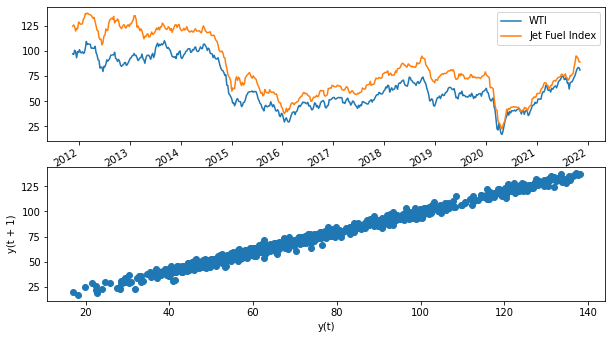

In [134]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10,6))
dataset.plot(ax = ax1)
pd.plotting.lag_plot(dataset)
plt.show()

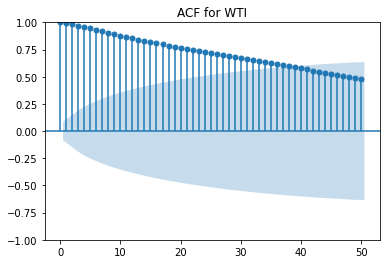

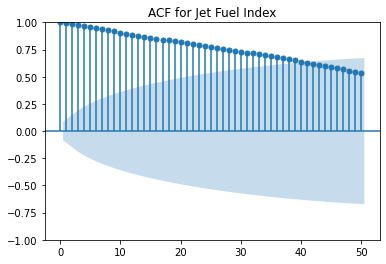

In [135]:

for i in dataset:
 plot_acf(dataset[i], lags = 50)
 plt.title('ACF for %s' % i) 
 plt.show()

In [136]:
def augmented_dickey_fuller_statistics(time_series):
  result = adfuller(time_series.values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [137]:
print('Augmented Dickey-Fuller Test: Gold Price Time Series')
augmented_dickey_fuller_statistics(dataset['WTI'])
print('Augmented Dickey-Fuller Test: Silver Price Time Series')
augmented_dickey_fuller_statistics(dataset['Jet Fuel Index'])

Augmented Dickey-Fuller Test: Gold Price Time Series
ADF Statistic: -1.710514
p-value: 0.425704
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Augmented Dickey-Fuller Test: Silver Price Time Series
ADF Statistic: -1.718478
p-value: 0.421618
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [138]:
n_obs = 10 
X_train, X_test = dataset[0:-n_obs], dataset[-n_obs:]

print(X_train.shape)
print(X_test.shape)

X_train_log = np.log(X_train)
X_train_log_diff =(X_train_log).diff().dropna()
X_train_log_diff.describe()

(512, 2)
(10, 2)


,WTI,Jet Fuel Index
count,511.000000,511.000000
mean,-0.000682,-0.000977
std,0.052631,0.038261
min,-0.346863,-0.300117
25%,-0.025340,-0.015453
50%,0.001720,0.000000
75%,0.023810,0.015452
max,0.275756,0.192512


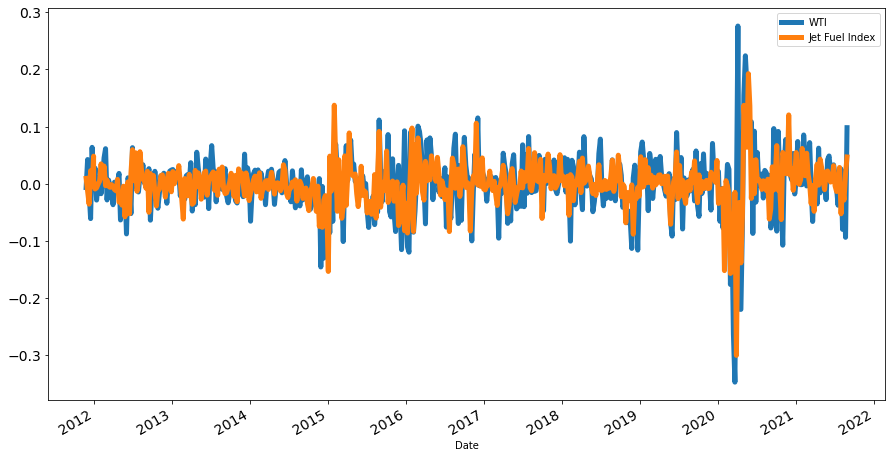

In [139]:
X_train_log_diff.plot(figsize = (15,8), linewidth = 5, fontsize = 14)
plt.show()

/Users/leftstories/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


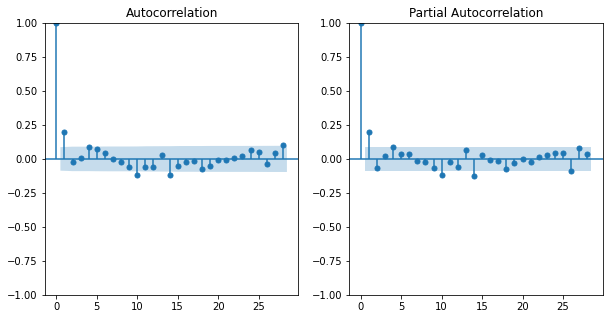

In [140]:
fig, ax = plt.subplots(1,2, figsize=(10,5)) 
ax[0] = plot_acf(X_train_log_diff['WTI'], ax=ax[0])
ax[1] = plot_pacf(X_train_log_diff['WTI'], ax=ax[1])

In [143]:
print('Augmented Dickey-Fuller Test: Heating Oil Price Time Series')
augmented_dickey_fuller_statistics(X_train_log_diff['WTI'])
print('Augmented Dickey-Fuller Test: Jet Fuel Price Time Series')
augmented_dickey_fuller_statistics(X_train_log_diff['Jet Fuel Index'])



Augmented Dickey-Fuller Test: Heating Oil Price Time Series
ADF Statistic: -7.172435
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
Augmented Dickey-Fuller Test: Jet Fuel Price Time Series
ADF Statistic: -8.553572
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [144]:
print(grangercausalitytests(X_train_log_diff[['WTI','Jet Fuel Index']], maxlag=15, addconst=True, verbose=True))



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=151.3003, p=0.0000  , df_denom=507, df_num=1
ssr based chi2 test:   chi2=152.1956, p=0.0000  , df=1
likelihood ratio test: chi2=133.1866, p=0.0000  , df=1
parameter F test:         F=151.3003, p=0.0000  , df_denom=507, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=108.1813, p=0.0000  , df_denom=504, df_num=2
ssr based chi2 test:   chi2=218.5091, p=0.0000  , df=2
likelihood ratio test: chi2=181.8038, p=0.0000  , df=2
parameter F test:         F=108.1813, p=0.0000  , df_denom=504, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=93.2380 , p=0.0000  , df_denom=501, df_num=3
ssr based chi2 test:   chi2=283.6223, p=0.0000  , df=3
likelihood ratio test: chi2=225.3503, p=0.0000  , df=3
parameter F test:         F=93.2380 , p=0.0000  , df_denom=501, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=69.2673 , p=0.0000  

In [145]:
#Initiate VAR model
model = VAR(endog=X_train_log_diff)
res = model.select_order(15)
res.summary()

/Users/leftstories/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,AIC,BIC,FPE,HQIC
0,-12.50,-12.49,3.714e-06,-12.50
1,-12.86,-12.81,2.606e-06,-12.84
2,-12.98,-12.89,2.313e-06,-12.94
3,-13.07,-12.95*,2.104e-06,-13.02
4,-13.07,-12.92,2.102e-06,-13.01
5,-13.13*,-12.94,1.989e-06*,-13.05*
6,-13.12,-12.90,2.004e-06,-13.03
7,-13.11,-12.86,2.015e-06,-13.02
8,-13.11,-12.82,2.024e-06,-13.00
9,-13.11,-12.78,2.034e-06,-12.98


In [147]:
#Fit to a VAR model
model_fit = model.fit(5)
#Print a summary of the model results
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 18, Nov, 2021
Time:                     15:13:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.9689
Nobs:                     506.000    HQIC:                  -13.0806
Log likelihood:           1913.66    FPE:                1.94029e-06
AIC:                     -13.1527    Det(Omega_mle):     1.85860e-06
--------------------------------------------------------------------
Results for equation WTI
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.000247         0.001810            0.137           0.891
L1.WTI                   -0.172915         0.046140           -3.748           0.000
L1.Jet Fuel Index         0.846279         0.0